# Sea Level Rise AR6
Notebook environment to migrate netcdf files to CF compliant zarr & CoG. 
Note, this is still quite a mess, TODO: clean up..

In [1]:
# Optional; code formatter, installed as jupyter lab extension
#%load_ext lab_black
# Optional; code formatter, installed as jupyter notebook extension
%load_ext nb_black

<IPython.core.display.Javascript object>

### Configure OS independent paths

In [2]:
# Import standard packages
import os
import pathlib
import sys
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import numpy.ma as ma
import rasterio
import rioxarray as rio


# Make root directories importable by appending root to path
cwd = pathlib.Path().resolve()
sys.path.append(os.path.dirname(cwd))

# Get root paths
home = pathlib.Path().home()
root = home.root
tmp_dir = home.joinpath("data", "tmp")

# Import custom functionality
from etl import p_drive
from etl.CF_compliancy_checker import check_compliancy, save_compliancy

# Define (local and) remote drives
coclico_data_dir = p_drive.joinpath("11205479-coclico", "FASTTRACK_DATA")

# Workaround to the Windows OS (10) udunits error after installation of cfchecker: https://github.com/SciTools/iris/issues/404
os.environ["UDUNITS2_XML_PATH"] = str(
    home.joinpath(  # change to the udunits2.xml file dir in your Python installation
        r"Anaconda3\pkgs\udunits2-2.2.28-h892ecd3_0\Library\share\udunits\udunits2.xml"
    )
)

# use local or remote data dir
use_local_data = False
ds_dirname = "17_AR6_SLP_IPCC"

if use_local_data: 
    ds_dir = tmp_dir.joinpath(ds_dirname)
else: 
    ds_dir = coclico_data_dir.joinpath(ds_dirname)

if not ds_dir.exists():
    raise FileNotFoundError("Directory with data does not exist.")

# directory to export result (make if not exists)
cog_dir = ds_dir.joinpath("cog")
cog_dir.mkdir(parents=True, exist_ok=True)

C:\Users\kras\AppData\Local\Temp\ipykernel_4856\399202600.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


<IPython.core.display.Javascript object>

In [3]:
# Project paths & files (manual input)
ds_ssp26_path = ds_dir.joinpath(f"total_ssp126_medium_confidence_values.nc")
ds_ssp45_path = ds_dir.joinpath(f"total_ssp245_medium_confidence_values.nc")
ds_ssp85_path = ds_dir.joinpath(f"total_ssp585_medium_confidence_values.nc")
ds_out_file = "total-slr_medium_confidence_values"
CF_dir = coclico_data_dir.joinpath(r"CF")  # directory to save output CF check files

<IPython.core.display.Javascript object>

### Check CF compliancy original NetCDF files

In [4]:
# open datasets
ds_26ssp = xr.open_dataset(ds_ssp26_path)
ds_45ssp = xr.open_dataset(ds_ssp45_path)
ds_85ssp = xr.open_dataset(ds_ssp85_path)

# check original dataset
ds_45ssp

<xarray.Dataset>
Dimensions:           (locations: 66190, quantiles: 107, years: 14)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * locations         (locations) int32 1 2 3 ... 1018003580 1018003590
  * quantiles         (quantiles) float32 0.0 0.001 0.005 ... 0.995 0.999 1.0
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Sat Jul 10 15:21:03 2021
    source:       Files Combined: /projects/kopp/ar6/regional/pboxes/pb_1f/ss...

<IPython.core.display.Javascript object>

In [5]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_ssp26_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [6]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_ssp26_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp126_medium_confidence_values.nc': {'warnings': '10', 'errors': '2'}}


<IPython.core.display.Javascript object>

In [7]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_ssp45_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [8]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_ssp45_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp245_medium_confidence_values.nc': {'warnings': '10', 'errors': '2'}}


<IPython.core.display.Javascript object>

In [9]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=ds_ssp85_path, working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [10]:
# save original CF compliancy
save_compliancy(cap, testfile=ds_ssp85_path, working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp585_medium_confidence_values.nc': {'warnings': '10', 'errors': '2'}}


<IPython.core.display.Javascript object>

### Make CF compliant alterations to the NetCDF files (dataset dependent)

In [11]:
# NetCDF attribute alterations

# # add global attributes
ds_26ssp.attrs["Conventions"] = "CF-1.8"
ds_45ssp.attrs["Conventions"] = "CF-1.8"
ds_85ssp.attrs["Conventions"] = "CF-1.8"

<IPython.core.display.Javascript object>

In [12]:
# rework the datasets

# construct lon, lat grid arrays
lonl = list(dict.fromkeys(ds_26ssp.lon.values[1030:])) # 1030 is where rasterized output starts (before we have arbitrary points)
latl = list(dict.fromkeys(ds_26ssp.lat.values[1030:])) # 1030 is where rasterized output starts (before we have arbitrary points)

# reshape sea level change variable
slc_26 = ds_26ssp["sea_level_change"].values[:,:,1030:].reshape(len(ds_26ssp.quantiles.values), len(ds_26ssp.years.values), len(latl), len(lonl)) # reshaped values
slc_45 = ds_45ssp["sea_level_change"].values[:,:,1030:].reshape(len(ds_45ssp.quantiles.values), len(ds_45ssp.years.values), len(latl), len(lonl)) # reshaped values
slc_85 = ds_85ssp["sea_level_change"].values[:,:,1030:].reshape(len(ds_85ssp.quantiles.values), len(ds_85ssp.years.values), len(latl), len(lonl)) # reshaped values

# re-order monotonically
slc_26 = slc_26[:,:,:,np.argsort(lonl)]
slc_26 = slc_26[:,:,np.argsort(latl),:]
slc_45 = slc_45[:,:,:,np.argsort(lonl)]
slc_45 = slc_45[:,:,np.argsort(latl),:]
slc_85 = slc_85[:,:,:,np.argsort(lonl)]
slc_85 = slc_85[:,:,np.argsort(latl),:]

# remove items that will be replaced
ds_26ssp = ds_26ssp.drop_vars({"sea_level_change", "lat", "lon", "locations"}) # make clean reworked dataset
ds_45ssp = ds_45ssp.drop_vars({"sea_level_change", "lat", "lon", "locations"}) # make clean reworked dataset
ds_85ssp = ds_85ssp.drop_vars({"sea_level_change", "lat", "lon", "locations"}) # make clean reworked dataset

# substitute new items
ds_26ssp = ds_26ssp.assign_coords({"lat": sorted(latl), "lon": sorted(lonl)}) # assign dimensions
ds_26ssp = ds_26ssp.assign(totslr_ens=(["quantiles", "years", "lat", "lon"], slc_26)) # assign data variabel
ds_45ssp = ds_45ssp.assign_coords({"lat": sorted(latl), "lon": sorted(lonl)}) # assign dimensions
ds_45ssp = ds_45ssp.assign(totslr_ens=(["quantiles", "years", "lat", "lon"], slc_45)) # assign data variabel
ds_85ssp = ds_85ssp.assign_coords({"lat": sorted(latl), "lon": sorted(lonl)}) # assign dimensions
ds_85ssp = ds_85ssp.assign(totslr_ens=(["quantiles", "years", "lat", "lon"], slc_85)) # assign data variabel

<IPython.core.display.Javascript object>

In [13]:
# NetCDF variable and dimension alterations

# rename or swap dimension names, the latter in case the name already exists as coordinate
ds_26ssp = ds_26ssp.rename_dims({"years": "time", "quantiles": "ensemble"})
ds_45ssp = ds_45ssp.rename_dims({"years": "time", "quantiles": "ensemble"})
ds_85ssp = ds_85ssp.rename_dims({"years": "time", "quantiles": "ensemble"})

# rename variables, if necessary
ds_26ssp = ds_26ssp.rename_vars({"years": "time", "quantiles": "ensemble"})
ds_45ssp = ds_45ssp.rename_vars({"years": "time", "quantiles": "ensemble"})
ds_85ssp = ds_85ssp.rename_vars({"years": "time", "quantiles": "ensemble"})

<IPython.core.display.Javascript object>

In [14]:
for i in [ds_26ssp, ds_45ssp, ds_85ssp]:
    i["time"].attrs["long_name"] = "time"
    i["time"].attrs["units"] = "yr"
    i["ensemble"].attrs["long_name"] = "ensemble"
    i["ensemble"].attrs["units"] = "1"
    i["lat"].attrs["long_name"] = "latitude"
    i["lat"].attrs["standard_name"] = "latitude"
    i["lat"].attrs["units"] = "degrees_north"
    i["lon"].attrs["long_name"] = "longitude"
    i["lon"].attrs["standard_name"] = "longitude"
    i["lon"].attrs["units"] = "degrees_east"
    i["totslr_ens"].attrs["long_name"] = "SSP1-2.6 total sea level rise"
    i["totslr_ens"].attrs["units"] = "mm"

<IPython.core.display.Javascript object>

In [15]:
# concat datasets along new dimension with index values and name derived from pandas index object, if necessary
dataset = xr.concat([ds_26ssp, ds_45ssp, ds_85ssp], dim="nscenarios")
dataset = dataset.assign_coords(
    scenarios=("nscenarios", np.array(["SSP1-26", "SSP2-45", "SSP5-85"], dtype="S"))
)

# dataset = xr.concat(
#     [dataset_historical, dataset_45rcp, dataset_85rcp],
#     pd.Index(["historical", "rcp45", "rcp85"], name="scenarios"),
# )

# dataset["scenarios"].values.astype("U") # retrieve scenarios as string

<IPython.core.display.Javascript object>

In [17]:
# re-order shape of the data variables
ds_26ssp = ds_26ssp.transpose("time", "lat", "lon", "ensemble")
ds_45ssp = ds_45ssp.transpose("time", "lat", "lon", "ensemble")
ds_85ssp = ds_85ssp.transpose("time", "lat", "lon", "ensemble")
dataset = dataset.transpose("nscenarios", "time", "lat", "lon", "ensemble")

# add or change certain variable / coordinate attributes
dataset_attributes = {
    "scenarios": {"long_name": "climate scenarios"}
}  # specify custom (CF convention) attributes

# add / overwrite attributes
for k, v in dataset_attributes.items():
    try:
        dataset[k].attrs = dataset_attributes[k]
    except:
        continue

# add epsg
ds_26ssp.attrs["crs"] = 4326
ds_45ssp.attrs["crs"] = 4326
ds_85ssp.attrs["crs"] = 4326
dataset.attrs["crs"] = 4326

# # add additional info
dataset.attrs["title"] = "Sea level rise from AR6"
dataset.attrs["institution"] = "International Panel on Climate Change (IPCC)"
dataset.attrs["references"] = (
    "Fox-Kemper, B., H. T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S. S. Drijfhout,"
    "T. L. Edwards, N. R. Golledge, M. Hemer, R. E. Kopp, G. Krinner, A. Mix, D. Notz,"
    "S. Nowicki, I. S. Nurhati, L. Ruiz, J-B. Sallée, A. B. A. Slangen, Y. Yu, 2021,"
    "Ocean, Cryosphere and Sea Level Change. In: Climate Change 2021: The Physical"
    "Science Basis. Contribution of Working Group I to the Sixth Assessment Report of" 
    "the Intergovernmental Panel on Climate Change [MassonDelmotte, V., P. Zhai, A."
    "Pirani, S. L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M. I."
    "Gomis, M. Huang, K. Leitzell, E. Lonnoy, J. B. R. Matthews, T. K. Maycock, T."
    "Waterfield, O. Yelekçi, R. Yu and B. Zhou (eds.)]. Cambridge University Press."
    "In Press."
)

<IPython.core.display.Javascript object>

In [18]:
# check the xarray dataset, best practice is to have as many as possible bold dimensions (dimension == coordinate name).
# in this way, the Front-End can access the variable directly without having to index the variable first

dataset
# dataset["nscenarios"]

<xarray.Dataset>
Dimensions:     (time: 14, ensemble: 107, lat: 181, lon: 360, nscenarios: 3)
Coordinates:
  * time        (time) int32 2020 2030 2040 2050 2060 ... 2120 2130 2140 2150
  * ensemble    (ensemble) float32 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
  * lat         (lat) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon         (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
    scenarios   (nscenarios) |S7 b'SSP1-26' b'SSP2-45' b'SSP5-85'
Dimensions without coordinates: nscenarios
Data variables:
    totslr_ens  (nscenarios, time, lat, lon, ensemble) float32 nan ... 6.324e+03
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Sat Jul 10 15:19:21 2021
    source:       Files Combined: /projects/kopp/ar6/regional/pboxes/pb_1f/ss...
    Conventions:  CF-1.8
    crs:          4326
    title:        Sea level rise from AR6
    institution:  International Panel on Climate Change (IPCC)
    references:   Fox-Kemper, B., H. T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, ...

<IPython.core.display.Javascript object>

In [19]:
# save new .nc files
ds_26ssp.to_netcdf(path=str(ds_ssp26_path).replace(".nc", "_CF.nc"))
ds_45ssp.to_netcdf(path=str(ds_ssp45_path).replace(".nc", "_CF.nc"))
ds_85ssp.to_netcdf(path=str(ds_ssp85_path).replace(".nc", "_CF.nc"))
dataset.to_netcdf(path=ds_dir.joinpath(ds_out_file + "_CF.nc"))

<IPython.core.display.Javascript object>

### Check CF compliancy altered NetCDF files

In [20]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_ssp26_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [21]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_ssp26_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp126_medium_confidence_values_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [22]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_ssp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [23]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_ssp45_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp245_medium_confidence_values_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [24]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=str(ds_ssp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [25]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=str(ds_ssp85_path).replace(".nc", "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total_ssp585_medium_confidence_values_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

In [26]:
%%capture cap --no-stderr
# check altered CF compliancy

check_compliancy(testfile=ds_dir.joinpath(ds_out_file + "_CF.nc"), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [27]:
# save altered CF compliancy
save_compliancy(
    cap, testfile=ds_dir.joinpath(ds_out_file + "_CF.nc"), working_dir=CF_dir,
)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\total-slr_medium_confidence_values_CF.nc': {'warnings': '0', 'errors': '0'}}


<IPython.core.display.Javascript object>

### write data to Zarr files

In [28]:
# export to zarr in write mode (to overwrite if exists)
#dataset.to_zarr(ds_dir.joinpath("%s.zarr" % ds_out_file), mode="w")

<IPython.core.display.Javascript object>

In [29]:
# check dataset
#ds_26ssp = xr.open_dataset(r"P:\11205479-coclico\FASTTRACK_DATA\17_AR6_SLP_IPCC\total_ssp126_medium_confidence_values_CF.nc")

<IPython.core.display.Javascript object>

### Write data to CoG

In [30]:
# plt.figure(figsize=(16,9))
# plt.scatter(ds['lon'][1030:], ds['lat'][1030:], s=1)
# #plt.scatter(ds['longitude'][2000:2100], ds['latitude'][2000:2100], s=1, c='r')
# # plt.xlim(-10,50)
# # plt.ylim(25,75)
# plt.grid()

<IPython.core.display.Javascript object>

In [31]:
# BOUNDS = 0
QUANT = 0.5 # 0 to 1
TIME = 0 # indices
VARIABLE = "totslr_ens"
SSP = 245 #126 #245 #585

def get_data_fp(data_dir, rcp_scenario):
    """Function to get the netcdf dataset fp to also keep track of rcp scenario used. """
    return data_dir.joinpath(f"total_ssp{SSP}_medium_confidence_values_CF.nc")

ds_fp = get_data_fp(ds_dir, SSP)
ds = xr.open_dataset(ds_fp)

# make array 2d, requires data alterations
rds = ds.sel({"ensemble": QUANT}).isel({"time": TIME})[VARIABLE]

# lonl = list(dict.fromkeys(ds.lon.values[1030:])) # 1030 is where rasterized output starts (before we have arbitrary points)
# latl = list(dict.fromkeys(ds.lat.values[1030:])) # 1030 is where rasterized output starts (before we have arbitrary points)
# vals = rds.sea_level_change.values[1030:].reshape(len(latl), len(lonl)) # reshaped values
# shuffled_vals = vals[:,np.argsort(lonl)]
# shuffled_vals = shuffled_vals[np.argsort(latl),:]

# rds_r = rds.drop_vars({"sea_level_change", "lat", "lon", "locations"}) # make clean reworked dataset
# rds_n = rds_r.assign_coords({"lat": sorted(latl), "lon": sorted(lonl)}) # assign dimensions
# rds_n = rds_n.assign(sea_level_change=(["lat", "lon"], shuffled_vals)) # assign data variabel
# rds_n = rds_n[VARIABLE]

rds.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
if not rds.rio.crs:
    rds = rds.rio.write_crs("EPSG:4326")

#rds.attrs["Conventions"] = "CF-1.8"

fname = f"{VARIABLE}_ssp{SSP}_quant{QUANT}_time{TIME}_CF.GeoTiff"
outpath = cog_dir.joinpath(fname)
rds.rio.to_raster(outpath, driver="GTiff")

<IPython.core.display.Javascript object>

In [32]:
# export to nc for quick CF compliancy check..
rds.to_netcdf(path=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")))
CF_dir = coclico_data_dir.joinpath(r"CF")

<IPython.core.display.Javascript object>

In [33]:
%%capture cap --no-stderr
# check original CF compliancy

check_compliancy(testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

<IPython.core.display.Javascript object>

In [34]:
# save original CF compliancy
save_compliancy(cap, testfile=cog_dir.joinpath(fname.replace(".GeoTiff", ".nc")), working_dir=CF_dir)

{'P:\\11205479-coclico\\FASTTRACK_DATA\\17_AR6_SLP_IPCC\\cog\\totslr_ens_ssp245_quant0.5_time0_CF.nc': {'warnings': '1', 'errors': '1'}}


<IPython.core.display.Javascript object>

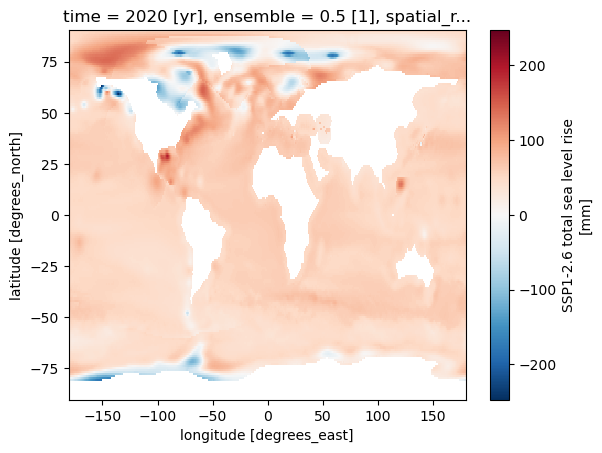

<IPython.core.display.Javascript object>

In [35]:
data = rio.open_rasterio(outpath, masked=True)
rds.plot()

In [36]:
import xarray as xr
import rioxarray as rio

ds_xr = xr.open_dataset(ds_dir.joinpath(f"total_ssp{SSP}_medium_confidence_values.nc"))
print(list(ds.dims))
print(list(ds.coords))
print(list(ds.variables))

['time', 'ensemble', 'lat', 'lon']
['time', 'ensemble', 'lat', 'lon']
['time', 'ensemble', 'lat', 'lon', 'totslr_ens']


<IPython.core.display.Javascript object>